### Universidad del Valle de Guatemala
#### Brandon Ronaldo Sicay Cumes - 21757
##### Laboratorio 3

## **Parte 1: Rompiendo ECB en Imágenes**

(código en archivo encrypt_image.py)

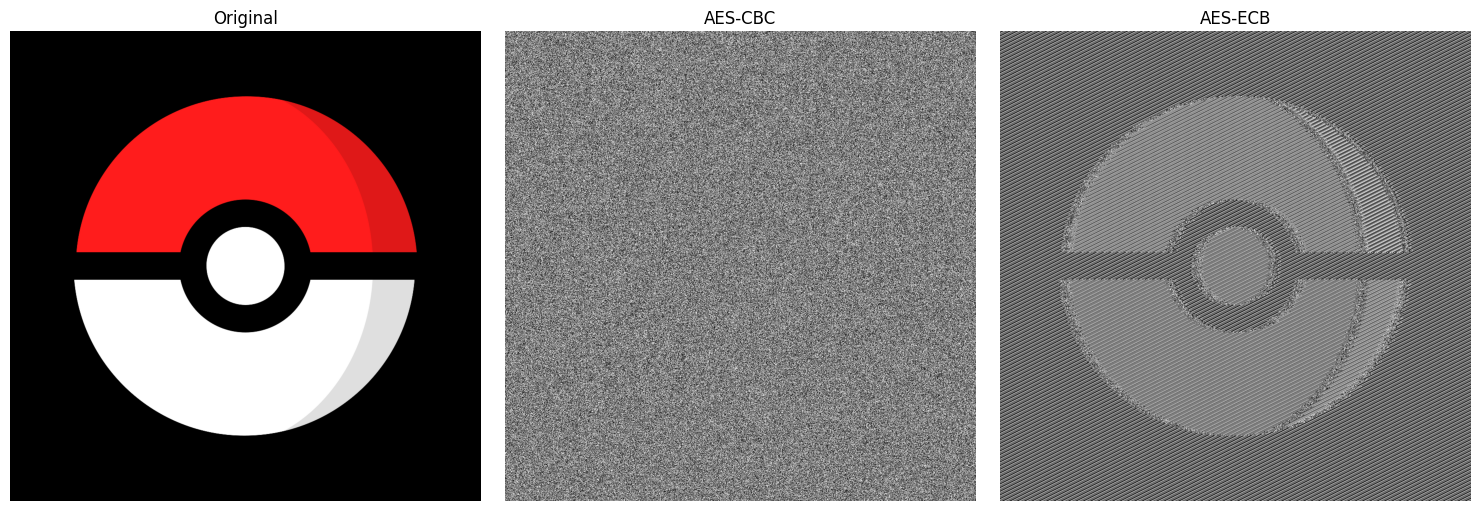

In [15]:
import matplotlib.pyplot as plt
from PIL import Image

# ---------- rutas ----------
orig_path = "./parte1/example.bmp"
cbc_path  = "./parte1/example_encrypted_cbc.png"
ecb_path  = "./parte1/example_encrypted_ecb.png"

# ---------- cargar imágenes ----------
orig_img = Image.open(orig_path).convert("RGB")
cbc_img  = Image.open(cbc_path).convert("RGB")
ecb_img  = Image.open(ecb_path).convert("RGB")

# ---------- mostrar ----------
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(orig_img)
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(cbc_img)
axs[1].set_title("AES-CBC")
axs[1].axis("off")

axs[2].imshow(ecb_img)
axs[2].set_title("AES-ECB")
axs[2].axis("off")

plt.tight_layout()
plt.show()



### • ¿Por qué el cifrado **ECB** deja ver los patrones de la imagen?
- En ECB cada bloque de 16 bytes se cifra **por separado** y **siempre igual**.  
- Si dos bloques de la imagen contienen los mismos píxeles en gris, su bloque cifrado también es idéntico.  
- Cuando el visor vuelve a colocar esos bytes en su posición, los bloques repetidos forman contornos y figuras que delatan la imagen original.


### • ¿Cómo cambia la apariencia con **CBC**?
- CBC mezcla cada bloque con el bloque cifrado anterior (el primero se mezcla con un IV aleatorio).  
- Eso significa que, aunque dos bloques de píxeles sean idénticos, su versión cifrada será **distinta**.  
- El resultado se ve como “ruido”: no hay contornos ni patrones reconocibles de la foto original.


### • ¿Es seguro usar **ECB** para datos estructurados?
| Contras de ECB | Resultado |
|------------------|-----------|
| Bloques iguales ⇒ ciphertext igual | Filtra patrones (imágenes, formularios, campos repetidos). |
| Sin “aleatoriedad” entre bloques | Permite copiar/pegar bloques para alterar el mensaje. |
| Fácil analizar frecuencia | Un atacante puede deducir contenido repetido o plantillas. |

En resumen, **ECB no es recomendable** para archivos, bases de datos, imágenes ni texto: revela demasiada información.  
Para protección real usa modos encadenados o autenticados (CBC con IV aleatorio, CTR, GCM, ChaCha20-Poly1305, etc.).
